# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

El objetivo principal de este análisis es evaluar el rendimiento de las tarifas de prepago Surf y Ultimate ofrecidas por Megaline, con el fin de determinar cuál de ellas genera más ingresos. Al entender mejor el comportamiento de los clientes y cómo cada tarifa se traduce en ingresos, el departamento comercial podrá ajustar su estrategia de publicidad y presupuesto, maximizando así la rentabilidad de la empresa.
Acciones Planeadas

Recolección de Datos
Utilizar los datos de 500 clientes proporcionados, que incluyen información sobre la tarifa utilizada, la ubicación de los clientes, la cantidad de llamadas realizadas y los mensajes de texto enviados en 2018. 

Limpieza y Preprocesamiento de Datos
Revisar los datos para identificar y manejar valores faltantes o inconsistentes. Asegurar que las variables estén en el formato adecuado para el análisis.


## Inicialización

In [280]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st 

## Cargar datos

In [282]:
llamadas = pd.read_csv('/Users/jorgecossyleongomez/Downloads/megaline_calls.csv')
internet = pd.read_csv('/Users/jorgecossyleongomez/Downloads/megaline_internet.csv')
mensajes = pd.read_csv('/Users/jorgecossyleongomez/Downloads/megaline_messages.csv')
planes = pd.read_csv('/Users/jorgecossyleongomez/Downloads/megaline_plans.csv')
usuarios = pd.read_csv('/Users/jorgecossyleongomez/Downloads/megaline_users.csv')

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [285]:
def primer_vista(datos):
    print("informacion")
    print(datos.info())
    print()
    print("muestra")
    print(datos.head())
    print()
    print("valores_duplicados")
    print(datos.duplicated().sum())
    print()
    print("valores_ausentes")
    print(datos.isna().sum())

In [286]:
primer_vista(llamadas)

informacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

muestra
         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22

valores_duplicados
0

valores_ausentes
id           0
user_id      0
call_date    0
duration     0
dtype: int64


In [287]:
llamadas["call_date"]= pd.to_datetime(llamadas["call_date"], format= "%Y-%m-%d")
print(llamadas["call_date"].head())
llamadas.nunique()

0   2018-12-27
1   2018-12-27
2   2018-12-27
3   2018-12-28
4   2018-12-30
Name: call_date, dtype: datetime64[ns]


id           137735
user_id         481
call_date       351
duration       2802
dtype: int64

In [288]:
primer_vista(internet)

informacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

muestra
         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22

valores_duplicados
0

valores_ausentes
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64


In [289]:
internet["session_date"]= pd.to_datetime(internet["session_date"], format= "%Y-%m-%d")
print(internet["session_date"].head())

0   2018-12-29
1   2018-12-31
2   2018-12-28
3   2018-12-26
4   2018-12-27
Name: session_date, dtype: datetime64[ns]


In [290]:
primer_vista(mensajes)

informacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

muestra
         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26

valores_duplicados
0

valores_ausentes
id              0
user_id         0
message_date    0
dtype: int64


In [291]:
mensajes["message_date"]= pd.to_datetime(mensajes["message_date"], format= "%Y-%m-%d")
print(mensajes["message_date"].head())

0   2018-12-27
1   2018-12-31
2   2018-12-31
3   2018-12-27
4   2018-12-26
Name: message_date, dtype: datetime64[ns]


In [292]:
primer_vista(planes)

informacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None

muestra
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0              

In [293]:
primer_vista(usuarios)

informacion
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

muestra
   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leoni

In [294]:
usuarios["reg_date"]= pd.to_datetime(usuarios["reg_date"], format= "%Y-%m-%d")
print(usuarios["reg_date"].head())

0   2018-12-24
1   2018-08-13
2   2018-10-21
3   2018-01-28
4   2018-05-23
Name: reg_date, dtype: datetime64[ns]


In [295]:
usuarios['churn_date'] = pd.to_datetime(usuarios['churn_date'], format="%Y-%m-%d", errors='coerce')
print(usuarios['churn_date'].head(20))

0           NaT
1           NaT
2           NaT
3           NaT
4           NaT
5           NaT
6    2018-12-18
7           NaT
8           NaT
9           NaT
10          NaT
11          NaT
12   2018-11-16
13          NaT
14          NaT
15          NaT
16          NaT
17          NaT
18          NaT
19          NaT
Name: churn_date, dtype: datetime64[ns]


## Tarifas

In [297]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [298]:
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Esta tabla proporciona una visión básica de las tarifas ofrecidas por la empresa, destacando los elementos clave de cada plan. 
La tabla combina diferentes tipos de datos:
int64: Utilizado para columnas que contienen enteros (número de mensajes, megabytes, minutos, pagos, etc.).
float64: Utilizado para columnas que representan costos por gigabyte, mensaje o minuto, lo que permite mayor precisión en los valores monetarios.
object: Utilizado para el nombre del plan, lo que es apropiado para texto.
Todas las columnas tienen 2 valores no nulos, lo que indica que no hay datos faltantes en este conjunto específico.

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

## Usuarios/as

In [305]:
usuarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [306]:
usuarios.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


Esta tabla ofrece una visión inicial de la base de clientes, mostrando información demográfica y sobre los planes que utilizan. Los datos  pueden ser útiles para una segmentación básica y para evaluar la retención de clientes en la empresa. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [310]:
usuarios.nunique()

user_id       500
first_name    458
last_name     399
age            58
city           73
reg_date      266
plan            2
churn_date     29
dtype: int64

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [313]:
usuarios["first_name"].str.lower().str.strip()
usuarios.nunique()

user_id       500
first_name    458
last_name     399
age            58
city           73
reg_date      266
plan            2
churn_date     29
dtype: int64

In [314]:
usuarios["last_name"].str.lower().str.strip()
usuarios.nunique()

user_id       500
first_name    458
last_name     399
age            58
city           73
reg_date      266
plan            2
churn_date     29
dtype: int64

In [315]:
usuarios["city"].str.lower().str.strip()
usuarios.nunique()

user_id       500
first_name    458
last_name     399
age            58
city           73
reg_date      266
plan            2
churn_date     29
dtype: int64

## Llamadas

In [317]:
llamadas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [318]:
llamadas.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


La tabla de datos proporciona una visión básica de los clientes y sus patrones de uso en el servicio de telecomunicaciones. Al observar la información demográfica, los tipos de planes, y los registros de llamadas, podemos identificar tendencias en la utilización del servicio.
El análisis muestra que los clientes tienen diferentes características, como edad y ubicación, y que utilizan los planes de formas variadas. La información sobre las llamadas también revela cómo los clientes interactúan con el servicio. 

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [322]:
llamadas.nunique()

id           137735
user_id         481
call_date       351
duration       2802
dtype: int64

In [323]:
llamadas['duracion_redondeada'] = np.ceil(llamadas['duration'])
llamadas['duracion_redondeada']= llamadas['duracion_redondeada'].astype(int)
print(llamadas.head())

         id  user_id  call_date  duration  duracion_redondeada
0   1000_93     1000 2018-12-27      8.52                    9
1  1000_145     1000 2018-12-27     13.66                   14
2  1000_247     1000 2018-12-27     14.48                   15
3  1000_309     1000 2018-12-28      5.76                    6
4  1000_380     1000 2018-12-30      4.22                    5


In [324]:
llamadas["mes"] = llamadas['call_date'].dt.month
print(llamadas.head())

         id  user_id  call_date  duration  duracion_redondeada  mes
0   1000_93     1000 2018-12-27      8.52                    9   12
1  1000_145     1000 2018-12-27     13.66                   14   12
2  1000_247     1000 2018-12-27     14.48                   15   12
3  1000_309     1000 2018-12-28      5.76                    6   12
4  1000_380     1000 2018-12-30      4.22                    5   12


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [327]:
llamadas_filtradas = llamadas[llamadas["user_id"] == 1025]
print(llamadas_filtradas)

Empty DataFrame
Columns: [id, user_id, call_date, duration, duracion_redondeada, mes]
Index: []


## Mensajes

In [329]:
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [330]:
mensajes.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Los registros de mensajes proporcionan una visión inicial sobre cómo los clientes utilizan el servicio de mensajería. A través de los datos, es posible identificar patrones en la frecuencia y los días en que se envían mensajes, lo que puede ayudar a comprender mejor las tendencias de comunicación entre los usuarios.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [336]:
mensajes["mes"] = mensajes['message_date'].dt.month
print(mensajes.head())

         id  user_id message_date  mes
0  1000_125     1000   2018-12-27   12
1  1000_160     1000   2018-12-31   12
2  1000_223     1000   2018-12-31   12
3  1000_251     1000   2018-12-27   12
4  1000_255     1000   2018-12-26   12


## Internet

In [338]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [339]:
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


La tabla proporciona un registro del uso de datos de un usuario específico a lo largo de varias sesiones, lo que puede ser útil para analizar patrones de consumo y comportamiento de uso en el tiempo.

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [345]:
internet["mes"]= internet["session_date"].dt.month
print(internet.head())

         id  user_id session_date  mb_used  mes
0   1000_13     1000   2018-12-29    89.86   12
1  1000_204     1000   2018-12-31     0.00   12
2  1000_379     1000   2018-12-28   660.40   12
3  1000_413     1000   2018-12-26   270.99   12
4  1000_442     1000   2018-12-27   880.22   12


In [346]:
internet["gb_used"]= internet["mb_used"]/1024
print(internet.head())

         id  user_id session_date  mb_used  mes   gb_used
0   1000_13     1000   2018-12-29    89.86   12  0.087754
1  1000_204     1000   2018-12-31     0.00   12  0.000000
2  1000_379     1000   2018-12-28   660.40   12  0.644922
3  1000_413     1000   2018-12-26   270.99   12  0.264639
4  1000_442     1000   2018-12-27   880.22   12  0.859590


In [347]:
internet.head()

,id,user_id,session_date,mb_used,mes,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [350]:
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [352]:
llamadas.head()

,id,user_id,call_date,duration,duracion_redondeada,mes
0,1000_93,1000,2018-12-27,8.52,9,12
1,1000_145,1000,2018-12-27,13.66,14,12
2,1000_247,1000,2018-12-27,14.48,15,12
3,1000_309,1000,2018-12-28,5.76,6,12
4,1000_380,1000,2018-12-30,4.22,5,12


In [353]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
llamadas_mes = llamadas.pivot_table(index=["user_id", "mes"], values="duracion_redondeada", aggfunc=["count", "sum"])
print(llamadas_mes.head())

                          count                 sum
            duracion_redondeada duracion_redondeada
user_id mes                                        
1000    12                   16                 124
1001    8                    27                 182
        9                    49                 315
        10                   65                 393
        11                   64                 426


In [354]:
llamadas_mes.columns=["total_llamadas", "minutos_usados"]

In [355]:
llamadas_mes.reset_index(inplace=True)

In [356]:
llamadas_mes.head()

,user_id,mes,total_llamadas,minutos_usados
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426


In [357]:
mensajes.head()

,id,user_id,message_date,mes
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [358]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
mensajes_mes= mensajes.pivot_table(index=["mes", "user_id"], values="id", aggfunc="count")

In [359]:
mensajes_mes.reset_index(inplace=True)

In [360]:
mensajes_mes.rename(columns={'id': 'cantidad_mensajes'}, inplace=True)

In [361]:
mensajes_mes.head()

,mes,user_id,cantidad_mensajes
0,1,1077,37
1,1,1196,23
2,1,1214,2
3,1,1362,21
4,2,1028,12


In [362]:
internet.head()

,id,user_id,session_date,mb_used,mes,gb_used
0,1000_13,1000,2018-12-29,89.86,12,0.087754
1,1000_204,1000,2018-12-31,0.00,12,0.000000
2,1000_379,1000,2018-12-28,660.40,12,0.644922
3,1000_413,1000,2018-12-26,270.99,12,0.264639
4,1000_442,1000,2018-12-27,880.22,12,0.859590


In [363]:
gb_consumidos= internet.pivot_table(index=[ "user_id", "mes"], values="gb_used", aggfunc="sum", fill_value=0)

In [364]:
gb_consumidos.reset_index(inplace=True)

In [365]:
gb_consumidos["gb_used"]= np.ceil(gb_consumidos['gb_used'])

In [366]:
gb_consumidos.head()

,user_id,mes,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [368]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
consumo_usuario= llamadas_mes.merge(mensajes_mes, on=["user_id", "mes"], how="outer").merge(gb_consumidos, on=["user_id", "mes"], how="outer")

In [369]:
consumo_usuario.query("minutos_usados> 500")

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used
9,1003,12,149.0,1104.0,50.0,27.0
23,1007,10,80.0,645.0,59.0,37.0
24,1007,11,80.0,524.0,48.0,24.0
25,1007,12,87.0,617.0,50.0,29.0
28,1008,12,85.0,634.0,26.0,15.0
...,...,...,...,...,...,...
2250,1491,10,75.0,585.0,51.0,9.0
2258,1493,9,66.0,529.0,NaN,15.0
2265,1494,10,78.0,616.0,38.0,15.0
2266,1494,11,82.0,509.0,35.0,18.0


In [370]:
consumo_usuario.tail()

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used
2288,1498,12,39.0,339.0,NaN,23.0
2289,1499,9,41.0,346.0,NaN,13.0
2290,1499,10,53.0,385.0,NaN,20.0
2291,1499,11,45.0,308.0,NaN,17.0
2292,1499,12,65.0,496.0,NaN,22.0


In [371]:
planes.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [372]:
usuarios.tail()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT
499,1499,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaT


In [373]:
usuarios["mes"]= usuarios["reg_date"].dt.month

In [374]:
usuarios.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,mes
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,12
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,8
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,10
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,5


In [375]:
usuarios.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
mes             0
dtype: int64

In [376]:
consumo_usuario= consumo_usuario.merge(usuarios[['user_id', 'plan',"city"]], on=['user_id'], how='outer')

In [377]:
consumo_usuario

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,339.0,NaN,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2299,1499,9.0,41.0,346.0,NaN,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2300,1499,10.0,53.0,385.0,NaN,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2301,1499,11.0,45.0,308.0,NaN,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"


In [378]:
fct_sales= consumo_usuario.merge(planes, left_on="plan", right_on="plan_name", how= "inner")

In [379]:
fct_sales.head()

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
2,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
3,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf
4,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf


In [380]:
fct_sales.fillna(0, inplace=True)

In [381]:
fct_sales.isna().sum()

user_id                  0
mes                      0
total_llamadas           0
minutos_usados           0
cantidad_mensajes        0
gb_used                  0
plan                     0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [382]:
fct_sales["gb_per_month_included"]= fct_sales["mb_per_month_included"]/ 1024

In [383]:
fct_sales.head()

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0
3,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0
4,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [385]:
def llamadas_cobrables (fila):

    minutos_usados= fila["minutos_usados"]
    
    extra_consumido= 0
    
    if minutos_usados > fila["minutes_included"]:
        extra_consumido = minutos_usados - fila["minutes_included"]
    return extra_consumido

In [386]:
fct_sales["minutos_cobrables"]= fct_sales.apply(llamadas_cobrables, axis=1)

In [387]:
fct_sales.head()

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,minutos_cobrables
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,0.0
1,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0
2,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0
3,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0
4,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0


In [388]:
fct_sales.query("minutos_cobrables > 0")

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,minutos_cobrables
9,1003,12.0,149.0,1104.0,50.0,27.0,surf,"Tulsa, OK MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,604.0
23,1007,10.0,80.0,645.0,59.0,37.0,surf,"Grand Rapids-Kentwood, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,145.0
24,1007,11.0,80.0,524.0,48.0,24.0,surf,"Grand Rapids-Kentwood, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,24.0
25,1007,12.0,87.0,617.0,50.0,29.0,surf,"Grand Rapids-Kentwood, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,117.0
29,1009,5.0,71.0,534.0,0.0,20.0,surf,"San Jose-Sunnyvale-Santa Clara, CA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,1489,10.0,66.0,518.0,84.0,15.0,surf,"Detroit-Warren-Dearborn, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,18.0
2260,1491,10.0,75.0,585.0,51.0,9.0,surf,"Grand Rapids-Kentwood, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,85.0
2275,1494,10.0,78.0,616.0,38.0,15.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,116.0
2276,1494,11.0,82.0,509.0,35.0,18.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,9.0


In [389]:
def mensajes_por_pagar (fila):

    mensajes_usados= fila["cantidad_mensajes"]
    extras_mensajes= 0

    if mensajes_usados > fila["messages_included"]:
        extras_mensajes= mensajes_usados - fila["messages_included"]

    return extras_mensajes

In [390]:
fct_sales["mensajes_extra"]= fct_sales.apply(mensajes_por_pagar, axis= 1)

In [391]:
fct_sales.query("mensajes_extra > 0")

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,minutos_cobrables,mensajes_extra
3,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,3.0
21,1007,8.0,70.0,456.0,51.0,24.0,surf,"Grand Rapids-Kentwood, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,1.0
23,1007,10.0,80.0,645.0,59.0,37.0,surf,"Grand Rapids-Kentwood, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,145.0,9.0
57,1014,12.0,150.0,1114.0,64.0,8.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,614.0,14.0
58,1015,12.0,16.0,96.0,68.0,18.0,surf,"Pittsburgh, PA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2246,1489,11.0,61.0,429.0,91.0,18.0,surf,"Detroit-Warren-Dearborn, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,41.0
2247,1489,12.0,55.0,394.0,86.0,15.0,surf,"Detroit-Warren-Dearborn, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,36.0
2256,1491,6.0,64.0,394.0,54.0,11.0,surf,"Grand Rapids-Kentwood, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,4.0
2257,1491,7.0,60.0,463.0,64.0,8.0,surf,"Grand Rapids-Kentwood, MI MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,14.0


In [392]:
def gb_usados_extra(fila):
    gb_usado= fila["gb_used"]
    gb_extra= 0

    if gb_usado > fila["gb_per_month_included"]:
        gb_extra= gb_usado-fila["gb_per_month_included"]

    return gb_extra

In [393]:
fct_sales["gigas_extras"]= fct_sales.apply(gb_usados_extra, axis= 1)

In [394]:
fct_sales.query("gigas_extras> 0")

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,minutos_cobrables,mensajes_extra,gigas_extras
3,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,3.0,7.0
4,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,4.0
5,1001,12.0,56.0,412.0,44.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,4.0
7,1002,11.0,55.0,386.0,32.0,19.0,surf,"Las Vegas-Henderson-Paradise, NV MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,4.0
9,1003,12.0,149.0,1104.0,50.0,27.0,surf,"Tulsa, OK MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,604.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,1498,11.0,41.0,223.0,0.0,19.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,4.0
2298,1498,12.0,39.0,339.0,0.0,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,8.0
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,5.0
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,500,20,10,0.03,0.03,surf,15.0,0.0,0.0,2.0


In [395]:
def calcular_ingreso_total(fila):
    ingreso_por_cliente = (
        fila["usd_monthly_pay"] +  (fila["minutos_cobrables"] * fila["usd_per_minute"]) + 
        (fila["mensajes_extra"] * fila["usd_per_message"]) +  (fila["gigas_extras"] * fila["usd_per_gb"])  
    )
    return ingreso_por_cliente

In [396]:
fct_sales["ingreso"]= fct_sales.apply(calcular_ingreso_total, axis=1)

In [397]:
fct_sales

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,minutos_cobrables,mensajes_extra,gigas_extras,ingreso
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.00
1,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,20.00
2,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,20.00
3,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,3.0,7.0,90.09
4,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,339.0,0.0,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,8.0,100.00
2299,1499,9.0,41.0,346.0,0.0,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,20.00
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,5.0,70.00
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,2.0,40.00


In [626]:
venta_total= fct_sales[fct_sales["plan"]== "surf"]

In [632]:
venta_surf= venta_total["ingreso"]
print(venta_surf.mean())

60.551728942368584


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [401]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

promedio_llamadas = fct_sales.groupby(["plan", "mes"])["minutos_usados"].mean().reset_index()

promedio_llamadas.rename(columns={"minutos_usados": "promedio_llamadas"}, inplace=True)


In [402]:
promedio_llamadas

,plan,mes,promedio_llamadas
0,surf,0.0,0.000000
1,surf,1.0,203.000000
2,surf,2.0,297.000000
3,surf,3.0,330.000000
4,surf,4.0,351.540000
5,surf,5.0,399.584416
6,surf,6.0,431.298969
7,surf,7.0,449.983471
8,surf,8.0,410.111111
9,surf,9.0,414.226804


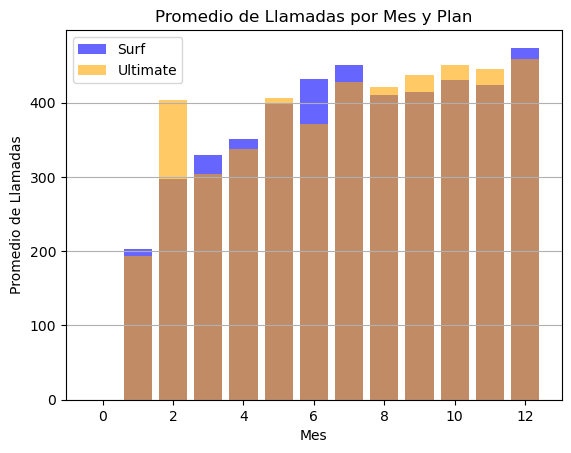

In [403]:
plt.bar(promedio_llamadas[promedio_llamadas["plan"] == "surf"]["mes"], 
        promedio_llamadas[promedio_llamadas["plan"] == "surf"]["promedio_llamadas"], 
        color="blue", label="Surf", alpha=0.6)

plt.bar(promedio_llamadas[promedio_llamadas["plan"] == "ultimate"]["mes"], 
        promedio_llamadas[promedio_llamadas["plan"] == "ultimate"]["promedio_llamadas"], 
        color="orange", label="Ultimate", alpha=0.6)


plt.title('Promedio de Llamadas por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de Llamadas')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y')
plt.show()



In [404]:
promedio_llamadas.head()

,plan,mes,promedio_llamadas
0,surf,0.0,0.00
1,surf,1.0,203.00
2,surf,2.0,297.00
3,surf,3.0,330.00
4,surf,4.0,351.54


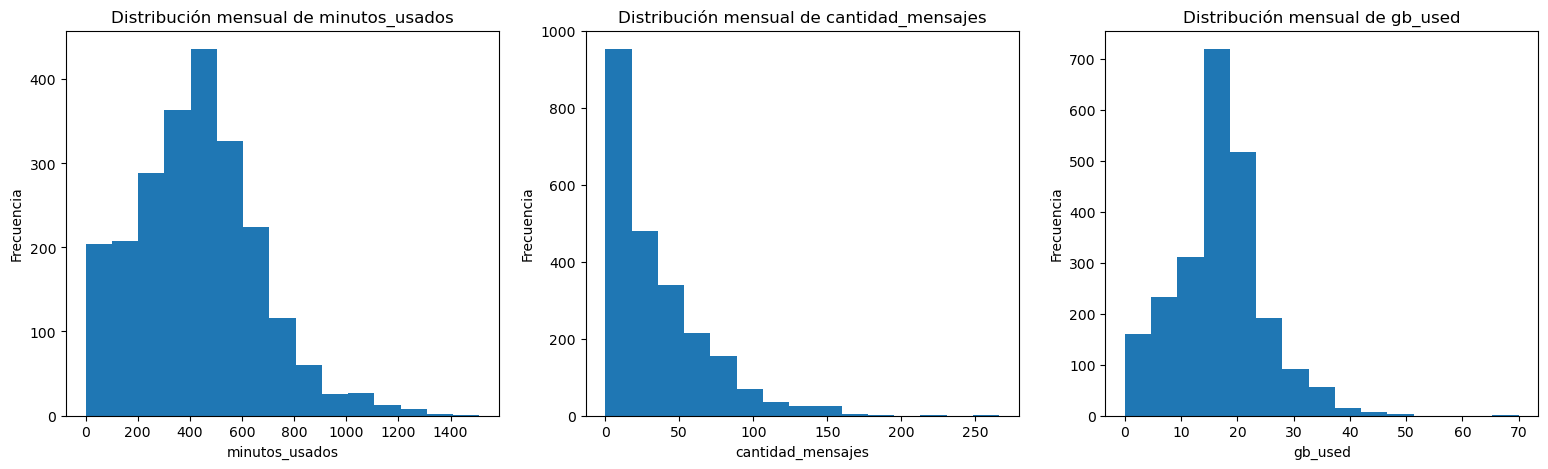

In [405]:
fig, ax = plt.subplots(1, 3, figsize=(19, 5))

columna = ["minutos_usados", "cantidad_mensajes", "gb_used"]

for i in range(3):
    ax[i].hist(fct_sales[columna[i]], bins=15)
    ax[i].set(title=f'Distribución mensual de {columna[i]}', xlabel=f'{columna[i]}', ylabel="Frecuencia")

plt.show()

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [407]:
# Calcula la media y la varianza de la duración mensual de llamadas.
variance = np.var(fct_sales["minutos_usados"])
variance

56377.1492872387

In [408]:
media= fct_sales["minutos_usados"].mean()
media

427.419452887538

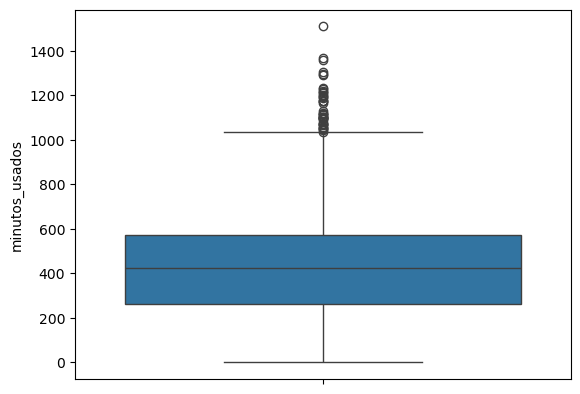

In [409]:
sns.boxplot(fct_sales["minutos_usados"])
plt.show()

In [410]:
clientes_preferentes= fct_sales.query("minutos_usados > 1000")
clientes_preferentes

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,minutos_cobrables,mensajes_extra,gigas_extras,ingreso
9,1003,12.0,149.0,1104.0,50.0,27.0,surf,"Tulsa, OK MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,604.0,0.0,12.0,158.12
57,1014,12.0,150.0,1114.0,64.0,8.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,614.0,14.0,0.0,38.84
218,1052,12.0,177.0,1200.0,266.0,27.0,surf,"Houston-The Woodlands-Sugar Land, TX MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,700.0,216.0,12.0,167.48
249,1057,10.0,162.0,1117.0,131.0,28.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.00
250,1057,11.0,159.0,1027.0,111.0,35.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,5.0,105.00
251,1057,12.0,158.0,1173.0,137.0,24.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.00
596,1126,11.0,147.0,1037.0,72.0,21.0,ultimate,"Chicago-Naperville-Elgin, IL-IN-WI MSA",1000,30720,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.00
674,1141,10.0,141.0,1069.0,21.0,16.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,569.0,0.0,1.0,47.07
768,1159,12.0,138.0,1071.0,110.0,14.0,ultimate,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",1000,30720,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.00
1037,1215,12.0,129.0,1167.0,98.0,34.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,667.0,48.0,19.0,231.45


El plan "Surf" parece contribuir más significativamente a los ingresos totales de la compañía, en especial debido a algunos usuarios que generan ingresos altos. Esto indica que la compañía podría beneficiarse de enfocarse en estrategias de retención y atracción para el plan "Surf".

### Mensajes

In [543]:
promedio_mensajes = fct_sales.groupby(["plan", "mes"])["cantidad_mensajes"].mean().reset_index()

promedio_mensajes.rename(columns={"cantidad_mensajes": "promedio_msj"}, inplace=True)

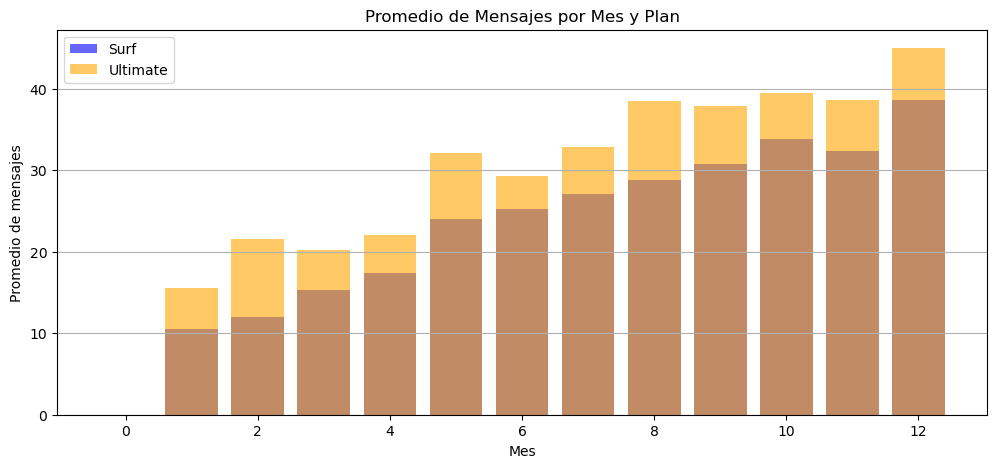

In [553]:
plt.figure(figsize=(12, 5)) 

plt.bar(promedio_mensajes[promedio_mensajes["plan"] == "surf"]["mes"], 
        promedio_mensajes[promedio_mensajes["plan"] == "surf"]["promedio_msj"], 
        color="blue", label="Surf", alpha=0.6)

plt.bar(promedio_mensajes[promedio_mensajes["plan"] == "ultimate"]["mes"], 
        promedio_mensajes[promedio_mensajes["plan"] == "ultimate"]["promedio_msj"], 
        color="orange", label="Ultimate", alpha=0.6)

plt.title('Promedio de Mensajes por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de mensajes')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y')
plt.show()

Los usuarios del plan Ultimate tienden a enviar un mayor promedio de mensajes a lo largo de los meses en comparación con los del plan Surf. Esto sugiere que los clientes de Ultimate tienen una mayor necesidad de comunicación, posiblemente debido a su estilo de vida o uso intensivo del servicio.
A pesar de su menor consumo, los usuarios del plan Surf muestran un crecimiento en el uso de mensajes con el tiempo. Esto sugiere que, aunque están satisfechos hasta cierto punto, hay oportunidades para mejorar el plan, como aumentar la cantidad de mensajes incluidos o ajustar la estrategia de precios.

In [577]:
surf_msj = promedio_mensajes[promedio_mensajes["plan"] == "surf"]

In [593]:
print(surf_msj["promedio_msj"].mean())
print(surf_msj["promedio_msj"].median())
print(surf_msj["promedio_msj"].mode()[0])
print(surf_msj["promedio_msj"].var())
print(surf_msj["promedio_msj"].std())

22.759384482000048
25.298969072164947
0.0
121.82772419061502
11.03755970269765


In [595]:
ultimate_msj=promedio_mensajes[promedio_mensajes["plan"] == "ultimate"]

In [598]:
print(ultimate_msj["promedio_msj"].mean())
print(ultimate_msj["promedio_msj"].median())
print(ultimate_msj["promedio_msj"].mode()[0])
print(ultimate_msj["promedio_msj"].var())
print(ultimate_msj["promedio_msj"].std())

28.697997687201276
32.10344827586207
0.0
154.4249935541774
12.426785326631236


### Internet

In [547]:
promedio_internet = fct_sales.groupby(["plan", "mes"])["gb_used"].mean().reset_index()

promedio_internet.rename(columns={"gb_used": "promedio_datos"}, inplace=True)

In [559]:
promedio_internet

,plan,mes,promedio_datos
0,surf,0.0,0.000000
1,surf,1.0,5.000000
2,surf,2.0,12.222222
3,surf,3.0,13.565217
4,surf,4.0,12.220000
5,surf,5.0,14.116883
6,surf,6.0,15.484536
7,surf,7.0,16.876033
8,surf,8.0,16.882716
9,surf,9.0,16.690722


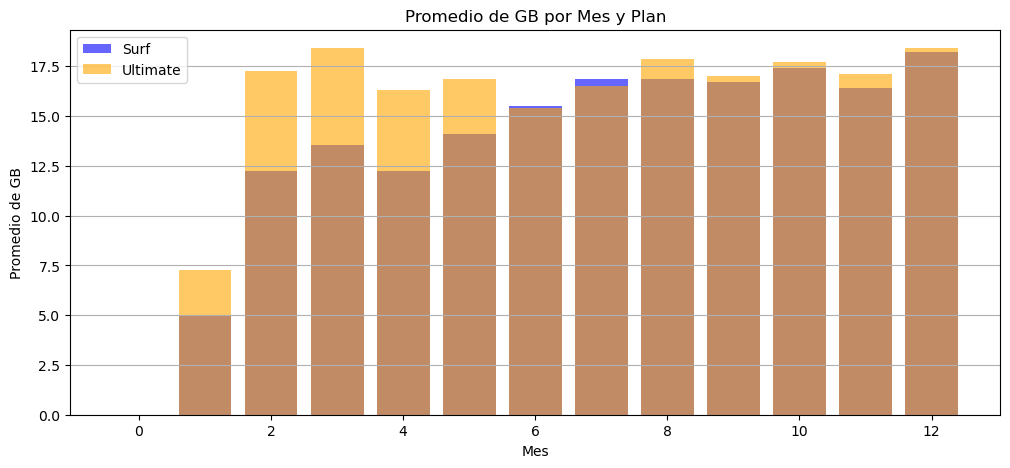

In [567]:
plt.figure(figsize=(12, 5)) 
plt.bar(promedio_internet[promedio_internet["plan"] == "surf"]["mes"], 
        promedio_internet[promedio_internet["plan"] == "surf"]["promedio_datos"], 
        color="blue", label="Surf", alpha=0.6)

plt.bar(promedio_internet[promedio_internet["plan"] == "ultimate"]["mes"], 
        promedio_internet[promedio_internet["plan"] == "ultimate"]["promedio_datos"], 
        color="orange", label="Ultimate", alpha=0.6)


plt.title('Promedio de GB por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de GB')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y')
plt.show()

La similitud en el consumo también puede indicar que la empresa podría beneficiarse al segmentar más finamente a sus clientes, creando planes que ofrezcan características personalizadas que reflejen mejor las necesidades reales de los usuarios.

In [600]:
surf_internet = promedio_internet[promedio_internet["plan"] == "surf"]

In [604]:
print(surf_internet["promedio_datos"].mean())
print(surf_internet["promedio_datos"].median())
print(surf_internet["promedio_datos"].mode()[0])
print(surf_internet["promedio_datos"].var())
print(surf_internet["promedio_datos"].std())

13.472130875928968
15.484536082474227
0.0
28.45309544008181
5.334144302517679


In [606]:
ultimate_internet= promedio_internet[promedio_internet["plan"] == "ultimate"]

In [608]:
print(ultimate_internet["promedio_datos"].mean())
print(ultimate_internet["promedio_datos"].median())
print(ultimate_internet["promedio_datos"].mode()[0])
print(ultimate_internet["promedio_datos"].var())
print(ultimate_internet["promedio_datos"].std())

15.088767790849177
17.011627906976745
0.0
28.755034367560356
5.362372084027773


## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [561]:
promedio_ingreso = fct_sales.groupby(["plan", "mes"])["ingreso"].mean().reset_index()

promedio_ingreso.rename(columns={"gb_used": "promedio_ingreso"}, inplace=True)

In [571]:
promedio_ingreso

,plan,mes,ingreso
0,surf,0.0,20.000000
1,surf,1.0,20.000000
2,surf,2.0,34.396667
3,surf,3.0,45.941304
4,surf,4.0,40.710600
5,surf,5.0,47.628182
6,surf,6.0,49.276289
7,surf,7.0,62.674050
8,surf,8.0,63.931173
9,surf,9.0,58.271495


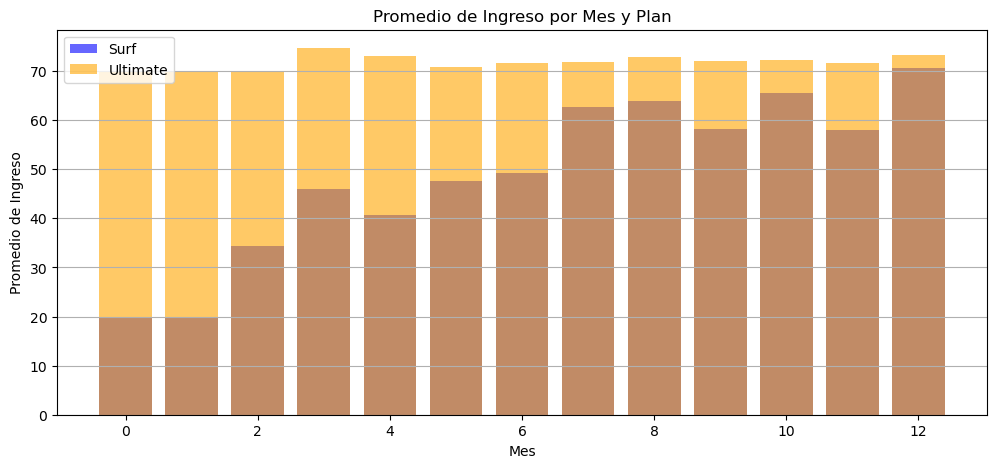

In [569]:
plt.figure(figsize=(12, 5)) 
plt.bar(promedio_ingreso[promedio_ingreso["plan"] == "surf"]["mes"], 
        promedio_ingreso[promedio_ingreso["plan"] == "surf"]["ingreso"], 
        color="blue", label="Surf", alpha=0.6)

plt.bar(promedio_ingreso[promedio_ingreso["plan"] == "ultimate"]["mes"], 
        promedio_ingreso[promedio_ingreso["plan"] == "ultimate"]["ingreso"], 
        color="orange", label="Ultimate", alpha=0.6)


plt.title('Promedio de Ingreso por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Promedio de Ingreso')
plt.xticks(rotation=0)
plt.legend()
plt.grid(axis='y')
plt.show()

Los usuarios del plan Ultimate presentan un ingreso promedio casi constante a lo largo del año, con valores que oscilan entre 70 y 75. Esto sugiere que este plan tiene una base de clientes estable que no incurre en costos adicionales, indicando satisfacción con el servicio y un uso controlado de los recursos.

En contraste, el plan Surf muestra una tendencia de ingresos más variable, especialmente en los meses intermedios, donde los ingresos fluctúan considerablemente. Este patrón podría ser indicativo de que los usuarios están utilizando servicios adicionales (como minutos y SMS de pago) o de que hay una mayor inestabilidad en la base de clientes de este plan.

In [640]:
venta_total= fct_sales[fct_sales["plan"]== "surf"]

In [642]:
venta_surf= venta_total["ingreso"]

In [634]:
print(venta_surf.mean())
print(venta_surf.median())
print(venta_surf.mode()[0])
print(venta_surf.var())
print(venta_surf.std())

60.551728942368584
40.18
20.0
3062.4468636121815
55.33937895940088


In [636]:
venta_total1= fct_sales[fct_sales["plan"]== "ultimate"]

In [638]:
venta_ultimate= venta_total1["ingreso"]

In [644]:
print(venta_ultimate.mean())
print(venta_ultimate.median())
print(venta_ultimate.mode()[0])
print(venta_ultimate.var())
print(venta_ultimate.std())

72.3011049723757
70.0
70.0
129.15955617706817
11.364838590013857


## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [649]:
venta_surf

1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2298    100.00
2299     20.00
2300     70.00
2301     40.00
2302     90.00
Name: ingreso, Length: 1579, dtype: float64

In [651]:
venta_ultimate

0       70.0
19      70.0
20      84.0
26      70.0
27      70.0
        ... 
2268    70.0
2269    70.0
2270    70.0
2271    70.0
2287    70.0
Name: ingreso, Length: 724, dtype: float64

In [424]:
hipotesis_nula:No hay diferencia en los ingresos promedio entre los dos planes.
hipotesis_alternativa: Hay una diferencia en los ingresos promedio entre los dos planes

In [693]:
resultado1= st.ttest_ind(venta_surf, venta_ultimate, equal_var=False)

In [697]:
resultado1.pvalue 

1.218411585212325e-15

In [659]:
alpha= 0.01

In [695]:
if resultado1.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

Podemos rechazar la hipotesis nula


In [663]:
fct_sales

,user_id,mes,total_llamadas,minutos_usados,cantidad_mensajes,gb_used,plan,city,messages_included,mb_per_month_included,...,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,minutos_cobrables,mensajes_extra,gigas_extras,ingreso
0,1000,12.0,16.0,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,...,70,7,0.01,0.01,ultimate,30.0,0.0,0.0,0.0,70.00
1,1001,8.0,27.0,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,20.00
2,1001,9.0,49.0,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,20.00
3,1001,10.0,65.0,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,3.0,7.0,90.09
4,1001,11.0,64.0,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,12.0,39.0,339.0,0.0,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,8.0,100.00
2299,1499,9.0,41.0,346.0,0.0,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,0.0,20.00
2300,1499,10.0,53.0,385.0,0.0,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,5.0,70.00
2301,1499,11.0,45.0,308.0,0.0,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15360,...,20,10,0.03,0.03,surf,15.0,0.0,0.0,2.0,40.00


In [673]:
NY_NJ= fct_sales[fct_sales["city"].isin(["New York-Newark-Jersey City, NY-NJ-PA MSA"])]
ciudades= fct_sales[~fct_sales["city"].isin(["New York-Newark-Jersey City, NY-NJ-PA MSA"])]

In [681]:
ingreso_NY= NY_NJ["ingreso"]

In [683]:
ingreso_ciudades= ciudades["ingreso"]

In [ ]:
hipotesis_nula:No hay diferencia en los ingresos promedio entre NY y NJ a las demas ciudades.
hipotesis_alternativa: Hay una diferencia en los ingresos promedio entre NY y NJ a las demas ciudades.

In [687]:
resultado= st.ttest_ind(ingreso_NY, ingreso_ciudades, equal_var=False)

In [689]:
alpha= 0.01

In [691]:
if resultado.pvalue < alpha:
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

No podemos rechazar la hipotesis nula


## Conclusión general

1. Consumo de Mensajes por Plan:

Se observó que el plan Ultimate tiene un mayor uso de mensajes a lo largo de los meses en comparación con el plan Surf, lo que indica que los usuarios de Ultimate tienen necesidades de comunicación más elevadas.
La tendencia de aumento en el uso de mensajes para ambos planes sugiere que los usuarios se están adaptando a las ofertas y posiblemente excediendo sus límites.
Uso de Datos:

A pesar de que el plan Ultimate incluye más GB, el consumo promedio de datos entre los usuarios de ambos planes es similar, lo que sugiere que la cantidad de datos proporcionada en el plan Surf puede no ser suficiente para satisfacer las necesidades de sus usuarios.
La tendencia en el uso de datos muestra un incremento constante en ambos planes, lo que puede indicar una mayor dependencia de servicios de datos móviles.

2. Uso de Datos:

A pesar de que el plan Ultimate incluye más GB, el consumo promedio de datos entre los usuarios de ambos planes es similar, lo que sugiere que la cantidad de datos proporcionada en el plan Surf puede no ser suficiente para satisfacer las necesidades de sus usuarios.
La tendencia en el uso de datos muestra un incremento constante en ambos planes, lo que puede indicar una mayor dependencia de servicios de datos móviles.

3. Ingresos Promedio por Plan:

Se formularon las siguientes hipótesis:
Hipótesis Nula (H₀): No hay diferencia en los ingresos promedio entre los dos planes.
Hipótesis Alternativa (H₁): Hay una diferencia en los ingresos promedio entre los dos planes.
Tras realizar el análisis, se rechazó la hipótesis nula, lo que indica que existe una diferencia significativa en los ingresos promedio entre los usuarios de los planes Surf y Ultimate.